In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

C:\Users\Stefano.DESKTOP-TULLGHQ\AppData\Local\Temp\ipykernel_6012\2766741643.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [3]:
dataframe = pd.read_csv("../dataset/AirPassengers.csv", usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float')

In [4]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

In [5]:
train_size = int(len(dataset) * 0.67)
test_size =  len(dataset) - train_size
train , test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [6]:
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test,look_back)

In [7]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [8]:
model = Sequential()
model.add(LSTM(4, input_shape=(look_back,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX,trainY,epochs=100,batch_size=1,verbose=2)



Epoch 1/100

92/92 - 1s - loss: 0.0196 - 1s/epoch - 14ms/step
Epoch 2/100
92/92 - 0s - loss: 0.0087 - 101ms/epoch - 1ms/step
Epoch 3/100
92/92 - 0s - loss: 0.0074 - 99ms/epoch - 1ms/step
Epoch 4/100
92/92 - 0s - loss: 0.0064 - 100ms/epoch - 1ms/step
Epoch 5/100
92/92 - 0s - loss: 0.0057 - 97ms/epoch - 1ms/step
Epoch 6/100
92/92 - 0s - loss: 0.0051 - 82ms/epoch - 888us/step
Epoch 7/100
92/92 - 0s - loss: 0.0044 - 102ms/epoch - 1ms/step
Epoch 8/100
92/92 - 0s - loss: 0.0041 - 103ms/epoch - 1ms/step
Epoch 9/100
92/92 - 0s - loss: 0.0038 - 95ms/epoch - 1ms/step
Epoch 10/100
92/92 - 0s - loss: 0.0037 - 95ms/epoch - 1ms/step
Epoch 11/100
92/92 - 0s - loss: 0.0038 - 94ms/epoch - 1ms/step
Epoch 12/100
92/92 - 0s - loss: 0.0036 - 94ms/epoch - 1ms/step
Epoch 13/100
92/92 - 0s - loss: 0.0035 - 93ms/epoch - 1ms/step
Epoch 14/100
92/92 - 0s - loss: 0.0036 - 84ms/epoch - 910us/step
Epoch 15/100
92/92 - 0s - loss: 0.0035 - 101ms/epoch - 1ms/step
Epoch 16/100
92/92 - 0s - loss: 0.0036 - 100ms/epoch 

2/2 [==============================] - 0s 0s/step
23.067599305130802
23.067599305130802


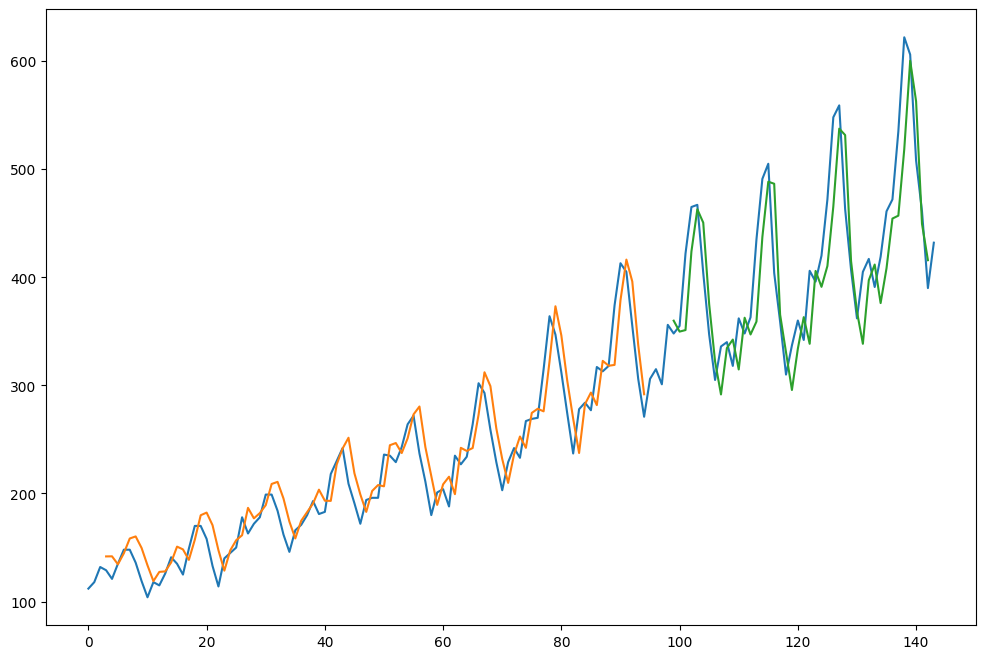

In [9]:
trainPredict = model.predict(trainX)
testPredict =model.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
trainY =  scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY =  scaler.inverse_transform([testY])

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
print(trainScore)
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print(trainScore)


trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[ : , :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+ look_back, :] = trainPredict

testPredictPlot = np.empty_like(dataset)
testPredictPlot[ : , :] = np.nan
testPredictPlot[len(trainPredict) + (look_back*2)+1:len(dataset)-1, :] = testPredict

plt.figure(figsize=(12,8))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()